### Import Library

In [1]:
import pandas as pd

### Read CSV File

In [2]:
df = pd.read_csv('data.csv')

### 1. Inspect dataset size, structure, and data types.
#### Dataset Size

In [21]:
print("Number of row and columns:", df.shape)
print("Column names:", df.columns.tolist())
print("Number of rows:", len(df))

Number of row and columns: (48842, 15)
Column names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Number of rows: 48842


In [ ]:
print("Data Information:")
print("=" * 50)
print(df.info())

Data Information:
<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       47879 non-null  str  
 2   fnlwgt          48842 non-null  int64
 3   education       48842 non-null  str  
 4   education-num   48842 non-null  int64
 5   marital-status  48842 non-null  str  
 6   occupation      47876 non-null  str  
 7   relationship    48842 non-null  str  
 8   race            48842 non-null  str  
 9   sex             48842 non-null  str  
 10  capital-gain    48842 non-null  int64
 11  capital-loss    48842 non-null  int64
 12  hours-per-week  48842 non-null  int64
 13  native-country  48568 non-null  str  
 14  income          48842 non-null  str  
dtypes: int64(6), str(9)
memory usage: 5.6 MB
None
732630


##### Data Type

In [38]:
print("Numerical columns:")
numerical_data = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_data)

Numerical columns:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [50]:
print("Categorical columns:")
categorical_data = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_data)

Categorical columns:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


C:\Users\VISA\AppData\Local\Temp\ipykernel_12128\1916295516.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_data = df.select_dtypes(include=['object']).columns.tolist()


### Dataset Structure

In [60]:
print("Categorical:")
print(df[categorical_data].head())
print("Numerical:")
print(df[numerical_data].head())

Categorical:
          workclass  education      marital-status         occupation  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex native-country income  
0  Not-in-family  White    Male  United-States  <=50K  
1        Husband  White    Male  United-States  <=50K  
2  Not-in-family  White    Male  United-States  <=50K  
3        Husband  Black    Male  United-States  <=50K  
4           Wife  Black  Female           Cuba  <=50K  
Numerical:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0          

### 2. Identify missing values and anomalies

In [54]:
print("Missing values in each column:")
print(df.isna().sum())

Missing values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [53]:
print("Missing values of each column in percentage:")
missing_percent = (df.isna().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0].round(2).astype(str) + "%")

Missing values of each column in percentage:
Series([], dtype: str)


#### Drop the missing value

In [52]:
df.dropna(inplace=True)

Visualizing missing values with a heatmap:


<Axes: >

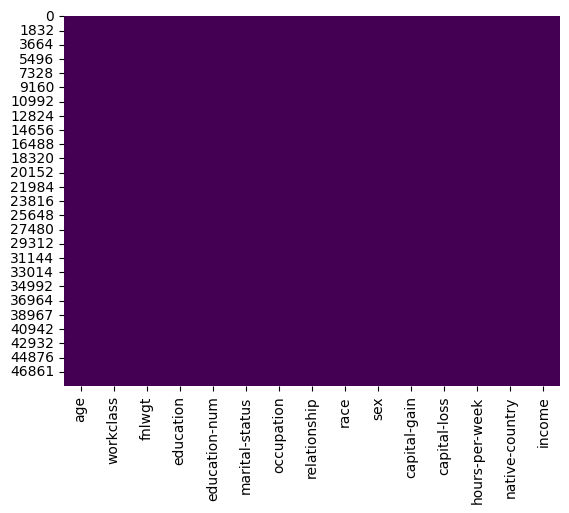

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Visualizing missing values with a heatmap:")
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [56]:
print("Identifying ananomalies in numerical columns:")
Q1 = df[numerical_data].quantile(0.25)
Q3 = df[numerical_data].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[numerical_data] < (Q1 - 1.5 * IQR)) | (df[numerical_data] > (Q3 + 1.5 * IQR))]
print(outliers.sum())

Identifying ananomalies in numerical columns:
age                   16745.0
workclass                   0
fnlwgt            728103394.0
education                   0
education-num          5686.0
marital-status              0
occupation                  0
relationship                0
race                        0
sex                         0
capital-gain       51961066.0
capital-loss        4183671.0
hours-per-week       492056.0
native-country              0
income                      0
dtype: object


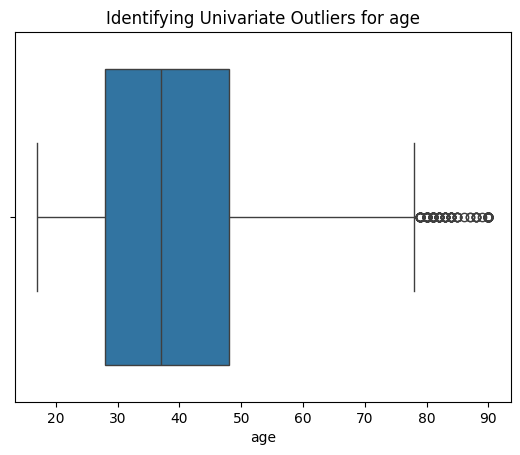

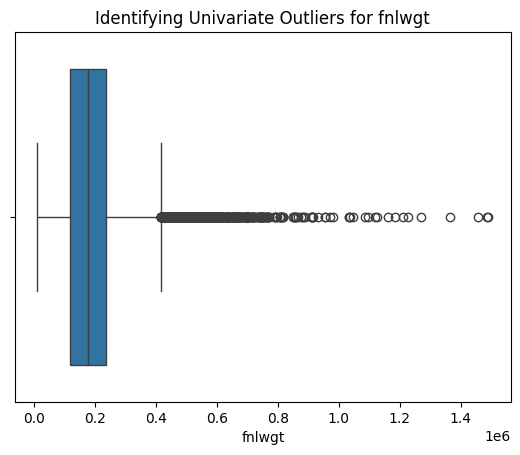

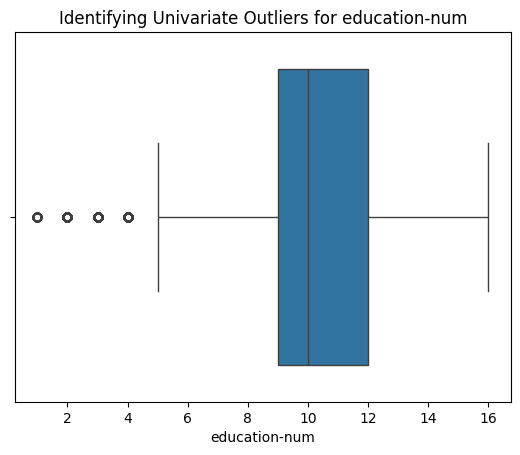

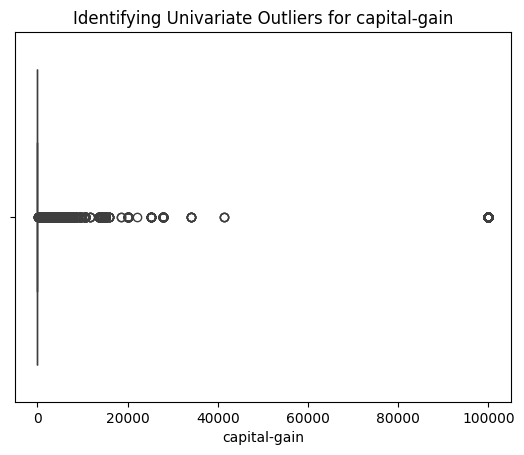

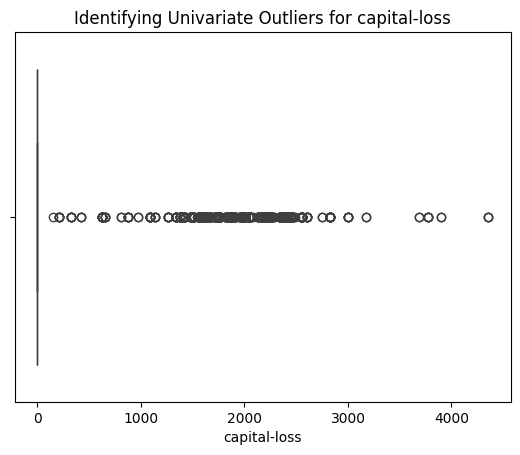

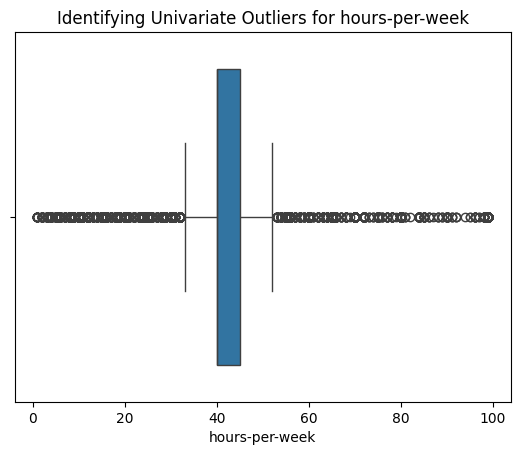

In [62]:
for i in numerical_data:
    sns.boxplot(x=df[i])
    plt.title(f'Identifying Univariate Outliers for {i}')
    plt.show()

In [66]:
for i in categorical_data:
     print(f"Unique values in {i}:")
     print(df[i].unique().tolist())
     print("-" * 50)

Unique values in workclass:
['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
--------------------------------------------------
Unique values in education:
['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
--------------------------------------------------
Unique values in marital-status:
['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
--------------------------------------------------
Unique values in occupation:
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
----------------------------------------------

In [74]:
for i in categorical_data:
    one_hot = pd.get_dummies(df[i], dtype=int)
    print(f"One-hot encoded columns for {i}:")
    print("-" * 50)
    print(one_hot.head().to_string(index=False))
    print("-" * 50)

One-hot encoded columns for workclass:
--------------------------------------------------
 ?  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay
 0            0          0             0        0             0                 0          1            0
 0            0          0             0        0             0                 1          0            0
 0            0          0             0        1             0                 0          0            0
 0            0          0             0        1             0                 0          0            0
 0            0          0             0        1             0                 0          0            0
--------------------------------------------------
One-hot encoded columns for education:
--------------------------------------------------
 10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-sch

In [76]:
counts = df[categorical_data[0]].value_counts(normalize=True)
rare_labels = counts[counts < 0.01]
print(f"Rare labels in {categorical_data[0]} (less than 1%):")
print(rare_labels)

Rare labels in workclass (less than 1%):
workclass
Without-pay     0.000441
Never-worked    0.000147
Name: proportion, dtype: float64


In [95]:
for i in categorical_data:
    print(f"Frequency distribution of {i}:")
    df[i].value_counts(normalize=True)
    threshold = 0.20
    rare_cats = df[i].value_counts(normalize=True)[df[i].value_counts(normalize=True) < threshold].index
    print(f"Rare categories in {i} (less than {threshold*100}%): {rare_cats.tolist()}")

Frequency distribution of workclass:
Rare categories in workclass (less than 20.0%): ['Self-emp-not-inc', 'Local-gov', 'State-gov', '?', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
Frequency distribution of education:
Rare categories in education (less than 20.0%): ['Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
Frequency distribution of marital-status:
Rare categories in marital-status (less than 20.0%): ['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
Frequency distribution of occupation:
Rare categories in occupation (less than 20.0%): ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', '?', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
Frequency distribution of relationship:
Ra

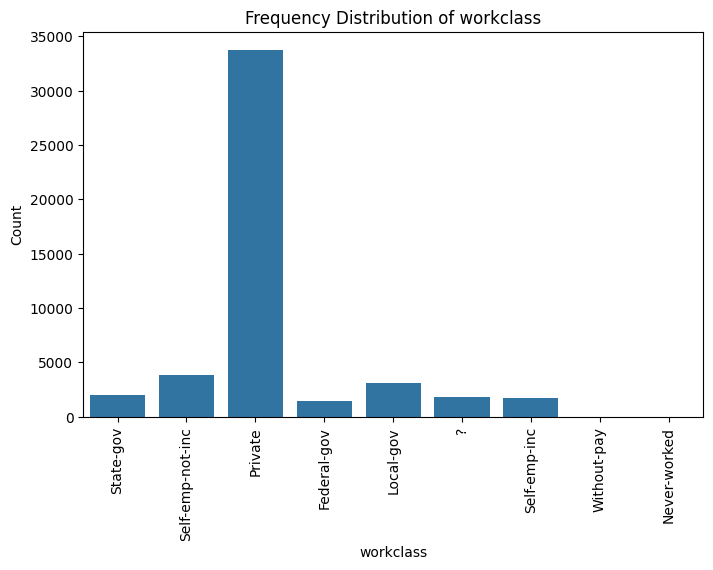

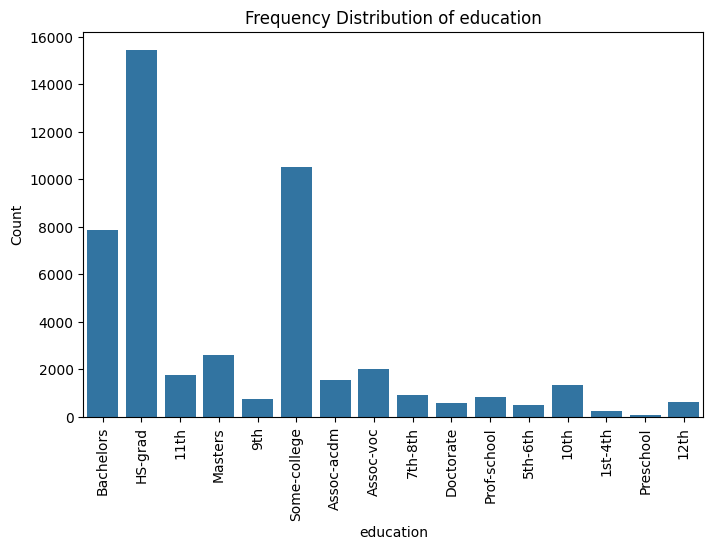

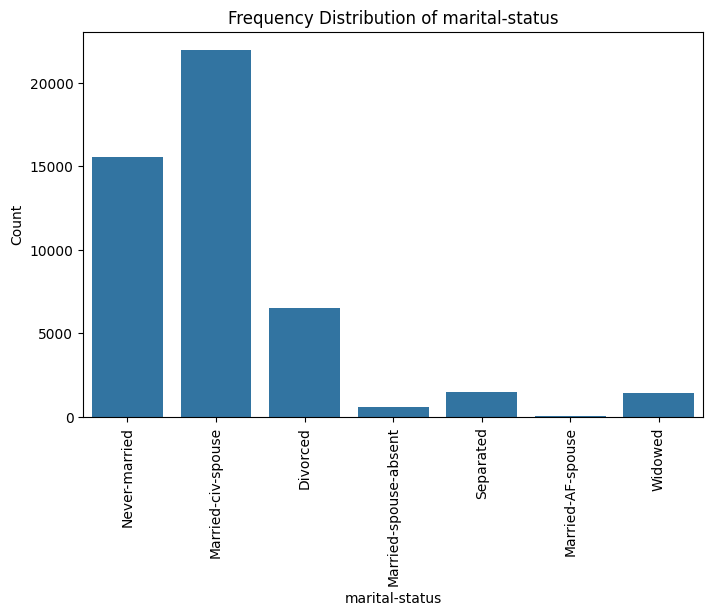

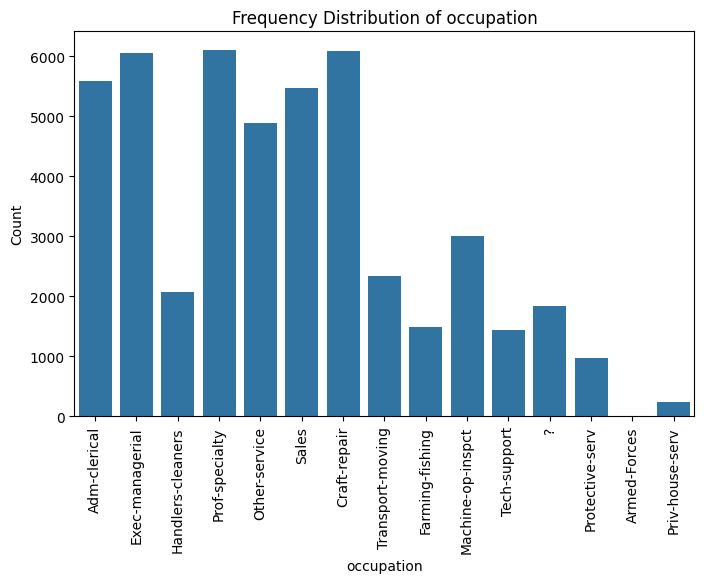

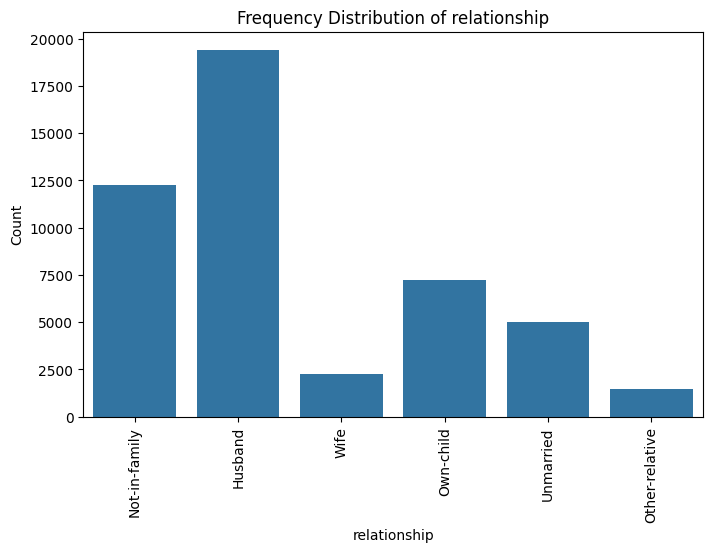

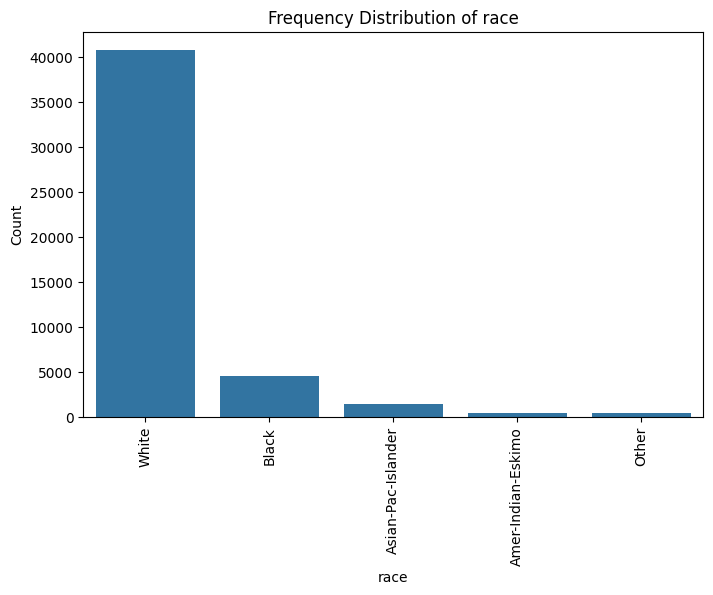

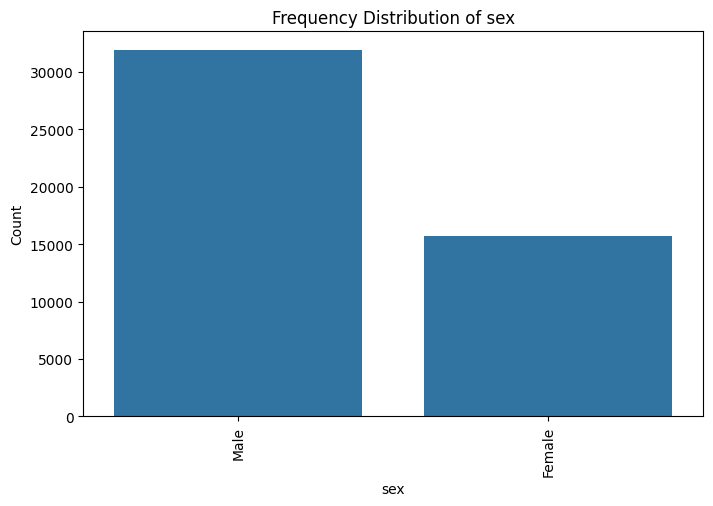

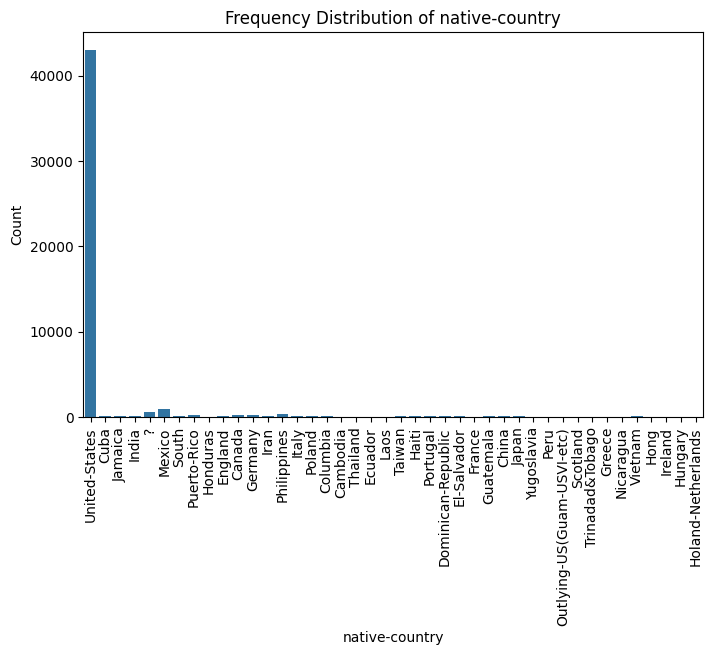

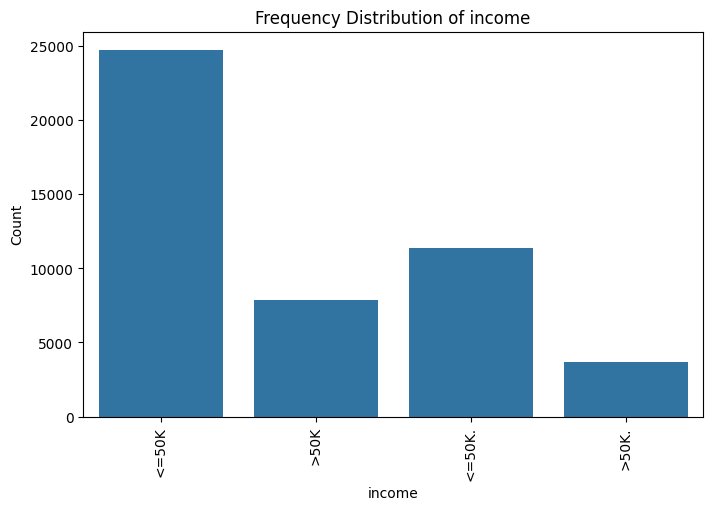

In [86]:
for i in categorical_data:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[i], data=df)
    plt.title(f'Frequency Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.show()